# 1. Importer les librairies

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 2. Charger le fichier

In [2]:
# charger le fichier csv (fichier "insurance.csv" téléchargé à partir du site Kaggle)
dataset = pd.read_csv("insurance.csv")

# 3. Analyse exploratoire

In [3]:
# Afficher les données
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Pour afficher le type de données
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

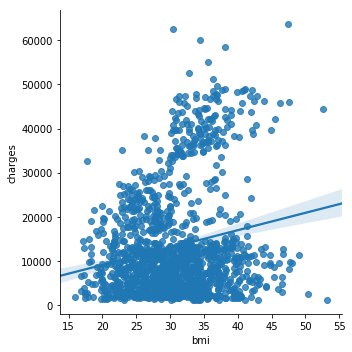

In [5]:
# Visualisation exploratoire avec Seaborn
sns.lmplot(x="bmi",y="charges", data = dataset)

#sns.lmplot(x="age",y="charges", data = dataset)
#sns.lmplot(x="smoker",y="charges", data = dataset)
#sns.lmplot(x="children",y="charges", data = dataset)

#### On remarque un nuage de point dense dont une partie traverse la droite d'équation : y i = β 0 + β 1 x 1 i + β 2 x 2 i + ε i 
charges = β 0 + β 1 x age + β 2 x bmi + β 3 x children + β 4 x sex_male + β 5 x smoker_yes + β 6 x region_northwest + 
β 7 x region_southeast + β 8 x region_southwest + constante

In [6]:
#1ère méthode : permet d'isoler les lignes et les colonnes , : pour tout prendre iloc index localisation
#x= dataset.iloc[:,[0,1,2,3,4,5]]
#y= dataset.iloc[:,6]

# 2ème méthode pour isoler lignes et colonnes
x = dataset.drop(['charges'], axis=1)
y = dataset['charges']

# Afficher les données de X
x.head() 

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [7]:
# Gérer les variables catégoriques, on remplace les données des colonnes "sexe", "smoker" et "region"par 0 ou 1
x = pd.get_dummies(x,drop_first= True) 
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [8]:
# Afficher les données après les transformations
x.dtypes

age                   int64
bmi                 float64
children              int64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [9]:
# Convertir "bmi" format float 64 en integer et afficher le type de données
x["bmi"]= x.bmi.astype(int)
x.dtypes

age                 int64
bmi                 int32
children            int64
sex_male            uint8
smoker_yes          uint8
region_northwest    uint8
region_southeast    uint8
region_southwest    uint8
dtype: object

In [10]:
# Afficher les données
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0


# 4. Préparation des données

In [11]:
# Séparer un dataset en training set et test set
from sklearn.cross_validation import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

C:\Users\KS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# Normalisation pour mettre à l'echelle
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# 5. Evaluation du modèle de Prédiction

In [13]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

# prediction
y_pred = regressor.predict(x_test)

# Méthode des r2
ecart = ((y_pred - y_test)**2)**(1/2)
round(ecart.mean(),2)

3925.54

#### On minimise l'écart d'erreur à environ 3925,54 dollars.

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# On détermine le coefficient directeur de chaque variables 'age','sex','bmi','steps','children','smoker','les 3 regions'
print("Pour les variables 'age,bmi,sex,children,smoker,les 3 regions',le coeff directeur est respectivement de : {}".format(regressor.coef_))

Pour les variables 'age,bmi,sex,children,smoker,les 3 regions',le coeff directeur est respectivement de : [ 3.57291815e+03  2.08226327e+03  5.33741912e+02 -7.93648139e+00
  9.52879099e+03 -1.07874444e+02 -4.14151639e+02 -3.35506901e+02]


In [16]:
# On détermine la constante de la droite y i = β 0 + β 1 x 1 i + β 2 x 2 i + ··· + β p x p i + ε i
regressor.intercept_

13201.182056009346

In [17]:
# Prédiction du montant de charges avec les valeurs "age, bmi, sexe, children, smoker et les 3 regions dont southwest"
np.around(regressor.predict([[18,36,1,1,0,0,1,0]]),decimals=2)

array([152586.84])

In [18]:
# On vérifie le résultat de la prédiction en appliquant l'équation de la régression mutiple
# charges = β 0 + β 1 x age + β 2 x bmi + β 3 x children + β 4 x sex_male + β 5 x smoker_yes + β 6 x region_northwest + β 7 x region_southeast + β 8 x region_southwest + constante
print("Le montant des charges est de : {} dollars".format(round(
3.57251875e+03*18+2.07745794e+03*36+5.28603986e+02*1+ -7.73099946e+00*1+9.52373675e+03*0+ -1.10681022e+02*0+ -4.07684444e+02*1 + -3.32163909e+02*0+13164.201699774767)))

Le montant des charges est de : 152371 dollars


#### Conclusion  :  Le résultat de la prédiction 152586.84 est proche de celui obtenu par l'équation de la régression multiple 152371. Donc, le modèle utilisé est bon.

# 6. Prédiction pour l'ensemble du test set

In [19]:
# Résulats de la prédiction du montant des charges pour le test set
np.around(regressor.predict(x_test),decimals=2)

array([11261.66,  9515.29, 38176.07, 16303.78,  7073.28,  4003.92,
        1637.4 , 14434.93,  9123.73,  7667.2 ,  4672.35, 10385.5 ,
        8658.52,  3844.66, 27940.  , 10823.34, 11353.69,  6105.24,
        8331.24, 27088.34, 33569.99, 14256.05, 11606.  , 32020.77,
        4056.85,  9304.88,  1155.6 ,  9963.32,  3672.66, 10442.8 ,
        8960.28, 40187.15, 15705.97, 13929.87, 24764.59,  5017.6 ,
       12705.93, 30802.44, 33478.48,  3723.42,  3856.34,  3820.23,
       30567.38, 39371.54, 27681.72,  5040.09, 10487.88,  7898.64,
        3446.03, 10039.85,  5589.68,  3296.52, 33193.38, 38641.46,
       15890.6 ,  7177.9 ,  5742.68,  9487.31,  8907.31, 11794.85,
        1776.55, 38814.89, 15022.02, 11866.27, 14017.1 , 14042.89,
       25906.85, 32291.11,   675.86, 10056.47, 12449.03, 11365.8 ,
       25312.36, 15481.97, 11369.57, 12629.47,  6614.5 ,  9514.84,
       30181.5 , 39175.49, 11950.  , 37379.48,  4395.63,  9485.56,
       34707.08, 28917.82,  8706.03,  5075.09, 12031.4 , 30533